# Lab Report: Bagging Classifiers

In this lab, we made 2 **bagging** algorithms with base classes as **Decision Tree** and **Logistic Regression**.

---

## Part 1: Bagging with Decision Trees on a Custom Dataset

We first made a custom dataset using `numpy` random functions and made an appropriate `y` value according to `x`. Then we made a single class for both logistic or decision tree, with arguments as no. of estimators and depth of tree in case of decision tree.



Though even a single model was able to accurately predict the output variable, we did get a slightly better result with using a **bagging** method.

These are the plots of `x` and `y` and following them are plots for 1 estimator, 20 estimators, and 500 estimators.

![data](data.png "data")
![1](1estimator.png "1estimator")
![20](20estimator.png "20estimator")
![500](500estimator.png "500estimator")





You can notice that even with too many models, the model doesn't rush to **overfit** the data, and that is the beauty of the bagging methods. This allows it to learn the representation of data, but due to randomness and voting schemes, provides an accurate representation at inference.

---

## Part 2: Bagging with Logistic Regression on Cancer Dataset

Further, we trained a similar **bagging** classifier with **Logistic Regression** on the `sklearn` cancer dataset and tested it on both 1 classifier and 20 classifiers.

The results were good for both of the models due to the nature of data being easily fittable to a sigmoid function. For example, here is feature one with respect to `y`; you can clearly see the activation, like the sigmoid.

![sigmoid](sigmoid.png "sigmoid")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import pyplot as plt

In [99]:
# Create a nonlinear (quadratic) boundary for class assignment
x = np.random.randn(2000, 2)
y = ((x[:, 0]**2 + x[:, 1]**2 + 0.5 * x[:, 0] * x[:, 1]) > 1.5).astype(int)

In [100]:
# Add label noise: flip 20% of the labels randomly
num_samples= 2000
columns = ['feature1', 'feature2', 'target']
noise_ratio = 0.2
num_noisy = int(noise_ratio * num_samples)
noisy_indices = np.random.choice(num_samples, num_noisy, replace=False)
y_noisy = y.copy()
y_noisy[noisy_indices] = 1 - y_noisy[noisy_indices]  # flip 0<->1

data_noisy = np.hstack([X, y_noisy.reshape(-1, 1)])
df_noisy = pd.DataFrame(data_noisy, columns=columns)
df_noisy.head()


,feature1,feature2,target
0,-0.076552,0.327760,1.0
1,0.684012,-0.334644,0.0
2,1.617938,-0.105347,0.0
3,-0.124294,-1.497533,0.0
4,-0.480334,0.816166,0.0


In [176]:


class bagging:
    def __init__(self, base, estimators, depth=5):
        self.base_model = base
        self.estimators = estimators
        if(base == "tree"):
            self.depth = depth
        else:
            self.depth = None

        if (base == "tree"):
            self.models = [DecisionTreeClassifier(max_depth=depth) for _ in range(self.estimators)]
        else:
            self.models = [LogisticRegression() for _ in range(self.estimators)]

    def fit(self, x, y):
       
        self.classes_ = np.unique(y)
        self.estimators_ = [] 

        n_samples = x.shape[0]
        for model in self.models:
           
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            bootstrap_x = x[indices]
            bootstrap_y = y[indices]
            
            fitted_model = model.fit(bootstrap_x, bootstrap_y)
            self.estimators_.append(fitted_model)
            
        return self

    def predict(self, x):
        # Check if fit has been called using the official helper
        check_is_fitted(self) 
        
        # Get predictions from all *fitted* models
        preds = np.array([model.predict(x) for model in self.estimators_])
        
        finalpreds = []
        for i in range(preds.shape[1]):
            values, counts = np.unique(preds[:, i], return_counts=True)
            finalpreds.append(values[np.argmax(counts)])
            
        return np.array(finalpreds)

    def plot_final_boundary(self, x, y):

        
        fig, ax = plt.subplots()
        
        disp = DecisionBoundaryDisplay.from_estimator(
            self,
            x,
            response_method="predict",
            cmap=plt.cm.RdYlBu,
            alpha=0.6,
            ax=ax,
            xlabel="Feature 1",
            ylabel="Feature 2",
        )
        
        ax.set_title(f"Final Ensemble Decision Boundary ({self.estimators} estimators)")
        plt.show()

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [178]:
from os import access

from sklearn.metrics import accuracy_score


onemodel = DecisionTreeClassifier()

onemodel.fit(X_train,y_train)

preds=onemodel.predict(X_test)


print("Accuracy of single model:",accuracy_score(y_test,preds))



Accuracy of single model: 0.98


In [183]:
#using bagging
bagmodel=bagging("tree",20,10)
bagmodel.fit(X_train,y_train)
preds=bagmodel.predict(X_test)
print("Accuracy of bagging model:",accuracy_score(y_test,preds))

Accuracy of bagging model: 0.97


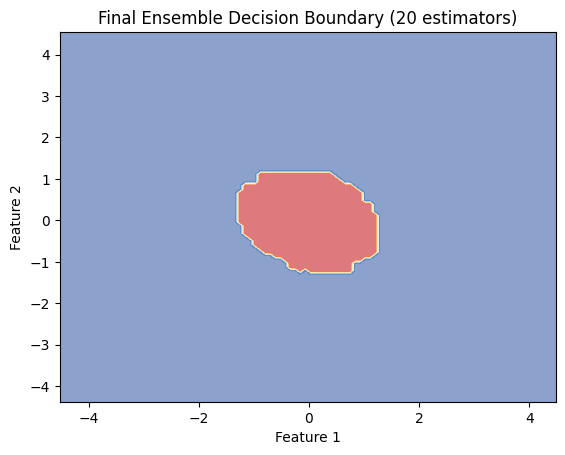

In [184]:
bagmodel.plot_final_boundary(X_train,y_train)

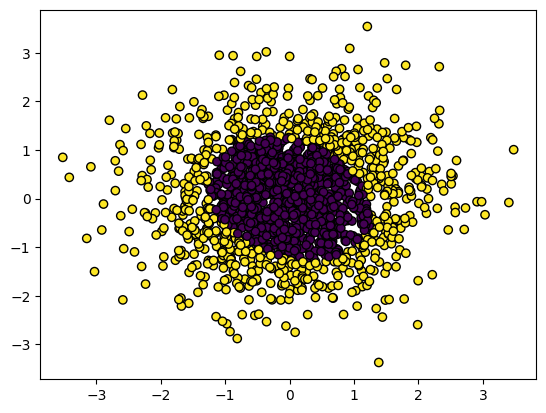

In [186]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")

In [190]:
#using bagging
bagmodel=bagging("tree",500,10)
bagmodel.fit(X_train,y_train)
preds=bagmodel.predict(X_test)
print("Accuracy of bagging model:",accuracy_score(y_test,preds))

Accuracy of bagging model: 0.98


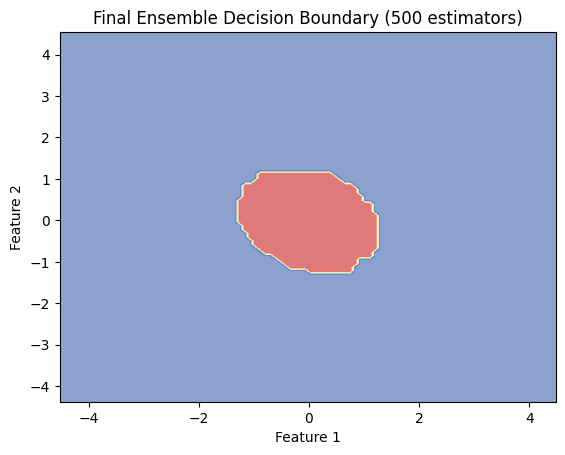

In [191]:
bagmodel.plot_final_boundary(X_train,y_train)

In [127]:
from sklearn.datasets import load_breast_cancer


cancer_data = load_breast_cancer()

In [199]:
data = cancer_data.data
target = cancer_data.target

In [200]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.15)

In [201]:
dt = LogisticRegression()
dt.fit(x_train, y_train)


c:\Users\Shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [202]:
ypred = dt.predict(x_test)
print("Accuracy :", accuracy_score(y_test, ypred))

Accuracy : 0.9651162790697675


In [203]:
logis_bagg=bagging("logistic",20)
logis_bagg.fit(x_train, y_train)
preds=logis_bagg.predict(x_test)
print("Accuracy of bagging model:",accuracy_score(y_test,preds))


c:\Users\Shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Accuracy of bagging model: 0.9767441860465116


c:\Users\Shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [205]:
x_train[:,0].shape


(483,)

In [206]:
y_train.shape

(483,)

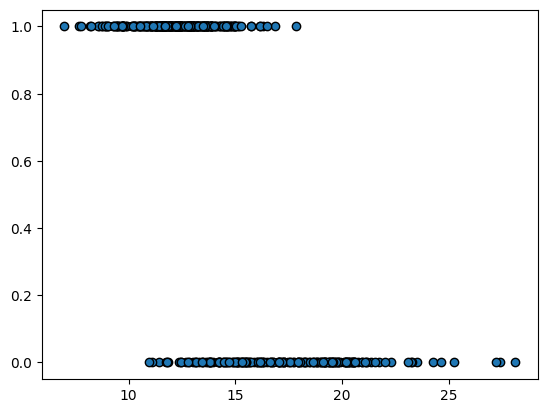

In [209]:
plt.scatter(x_train[:,0],y_train, edgecolor="k")